In [1]:
#pip install opencv-python

In [2]:
#img.shape -> imprimir la longitud de la matriz
#img -> imprimir la matriz
#show -> imprimir la imagen
#read -> leer la imagen


In [3]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import cv2

#mostrar imagen
show = lambda x: plt.imshow(x)
sign = lambda x: 1 if x>0 else 0
read = lambda x: cv2.imread(x)

#convertir imagen a escala de grises
def convert_to_grayscale(x):
    r = x
    rows = x.shape[0]
    columns = x.shape[1]
    for i in range(rows):
        for j in range(columns):
            r[i, j] = sum(x[i, j])/3
    return r

def convert_grayscale_to_matrix(x):    
    rows = x.shape[0]
    columns = x.shape[1]    
    r = zeros((rows, columns))
    for i in range(rows):
        for j in range(columns):
            r[i,j] = x[i,j,0]
    return r

def add_boder_to_matrix(x):
    rows = x.shape[0]
    columns = x.shape[1]
    r = zeros((rows + 2 , columns + 2))
    for i in range(rows):
        for j in range(columns):
            r[i+1,j+1] = x[i,j]
    return r

def convert_matrix_to_grayscale(x):    
    rows = x.shape[0]
    columns = x.shape[1]    
    r = zeros((rows, columns , 3 ), dtype = int) 
    r  = np.array(r)
    for i in range(rows):
        for j in range(columns):
            r[i,j] = [ x[i,j] , x[i,j] , x[i,j] ]

    return r
def create_matrix_vector_diff_8(x):
    rows = x.shape[0]
    columns = x.shape[1]    
    r = zeros((rows, columns, 8 ))    
    for i in range(1, rows-1):
        for j in range(1, columns-1):
            r[i][j][0] = sign( int( x[i][j] ) -  int( x[i-1][j  ] ) )
            r[i][j][1] = sign( int( x[i][j] ) -  int( x[i-1][j+1] ) )
            r[i][j][2] = sign( int( x[i][j] ) -  int( x[i  ][j+1] ) )
            r[i][j][3] = sign( int( x[i][j] ) -  int( x[i+1][j+1] ) )
            r[i][j][4] = sign( int( x[i][j] ) -  int( x[i+1][j  ] ) )
            r[i][j][5] = sign( int( x[i][j] ) -  int( x[i+1][j-1] ) )
            r[i][j][6] = sign( int( x[i][j] ) -  int( x[i  ][j-1] ) )
            r[i][j][7] = sign( int( x[i][j] ) -  int( x[i-1][j-1] ) )
    return r

def remove_boder_to_matrix_diff_8(x):
    rows = x.shape[0]
    columns = x.shape[1]
    r = zeros((rows - 2 , columns - 2, 8 ))  
    for i in range(1, rows-1):
        for j in range(1, columns-1):
            r[i-1,j-1] = x[i,j]
    return r


Inicio

convert_grayscale_to_matrix
[[125. 122. 108. ... 149. 147. 150.]
 [123. 120. 112. ... 154. 154. 153.]
 [126. 124. 113. ... 159. 163. 162.]
 ...
 [ 49. 105. 135. ... 159. 156. 150.]
 [ 67. 115. 143. ... 156. 161. 163.]
 [ 85. 126. 142. ... 152. 158. 168.]]

add_boder_to_matrix
[[  0.   0.   0. ...   0.   0.   0.]
 [  0. 125. 122. ... 147. 150.   0.]
 [  0. 123. 120. ... 154. 153.   0.]
 ...
 [  0.  67. 115. ... 161. 163.   0.]
 [  0.  85. 126. ... 158. 168.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]


create_matrix_vector_diff_8
[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [1. 1. 1. ... 1. 1. 1.]
  [1. 1. 1. ... 0. 0. 1.]
  ...
  [1. 1. 0. ... 0. 0. 1.]
  [1. 1. 1. ... 0. 1. 1.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 1. 1. ... 1. 1. 1.]
  [0. 1. 1. ... 0. 0. 0.]
  ...
  [1. 1. 1. ... 0. 0. 1.]
  [1. 1. 1. ... 0. 

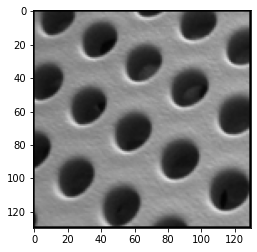

In [13]:
def proceso():
    img = read('../Base/Train/c003_001.png')
    show(img)
    
    #convertir en escala de grises
    img1 = convert_to_grayscale(img)
    show(img1)
    
    m = convert_grayscale_to_matrix(img)
    print('convert_grayscale_to_matrix')
    print(m)
    print()
    
    m = add_boder_to_matrix(m)
    print('add_boder_to_matrix')
    print(m)
    print()
    
    show( convert_matrix_to_grayscale(m) )
    print()
    
    m = create_matrix_vector_diff_8(m)
    print('create_matrix_vector_diff_8')
    print(m)
    print()
    
    m = remove_boder_to_matrix_diff_8(m)
    print('remove_boder_to_matrix')
    print(m)
    print()
    
def main():
    print('Inicio')
    print()
    
    proceso()

    print()
    print('Fin')
main()